In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('./data/examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
from matplotlib import pyplot as plt
figure1 = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

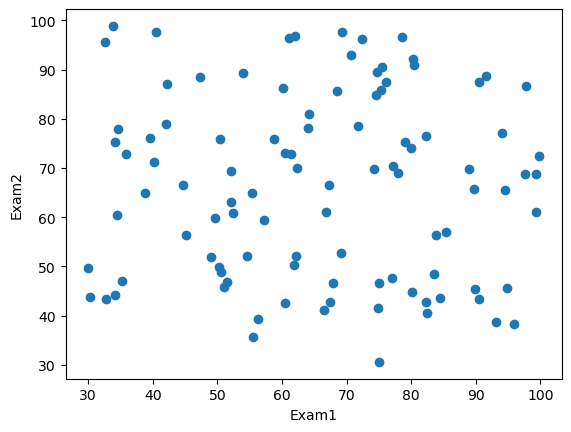

In [3]:
figure1 = plt.figure()
plt.scatter(data.loc[:, 'Exam1'], data.loc[:, "Exam2"]) # 散点图
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [49]:
flag = data.loc[:, 'Pass'] == 1
print(flag)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


TypeError: 'str' object is not callable

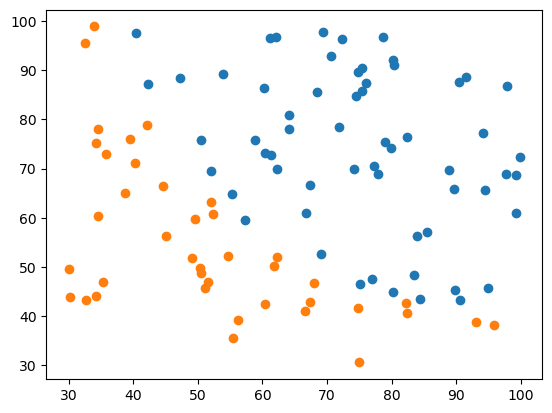

In [47]:
figure2 = plt.figure()
passed = plt.scatter(data.loc[:, 'Exam1'][flag], data.loc[:, 'Exam2'][flag])
failed = plt.scatter(data.loc[:, 'Exam1'][~flag], data.loc[:, 'Exam2'][~flag])
plt.title = ('Exam1-Exam2')
plt.xlabel('Examl')
plt.ylabel('Exam2')
plt.legend((passed, failed),('passed', 'failed'))
plt.show()

In [11]:
print(data.loc[:, 'Exam1'][flag])

3     60.182599
4     79.032736
6     61.106665
7     75.024746
8     76.098787
9     84.432820
12    82.307053
13    69.364589
15    53.971052
16    69.070144
18    70.661510
19    76.978784
21    89.676776
24    77.924091
25    62.271014
26    80.190181
30    61.379289
31    85.404519
33    52.045405
37    64.176989
40    83.902394
42    94.443368
46    77.193035
47    97.771599
48    62.073064
49    91.564975
50    79.944818
51    99.272527
52    90.546714
56    97.645634
58    74.248691
59    71.796462
60    75.395611
66    40.457551
68    80.279574
69    66.746719
71    64.039320
72    72.346494
73    60.457886
74    58.840956
75    99.827858
76    47.264269
77    50.458160
80    88.913896
81    94.834507
82    67.319257
83    57.238706
84    80.366756
85    68.468522
87    75.477702
88    78.635424
90    94.094331
91    90.448551
93    74.492692
94    89.845807
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, dtype: float64


In [12]:
flag

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool

In [32]:
# define 数据
x = data.drop(['Pass'], axis = 1)
y = data.loc[:, 'Pass']
x1 = data.loc[:, 'Exam1']
x2 = data.loc[:, 'Exam2']
x.head()

,Exam1,Exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x, y)
y_predict = LR.predict(x)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
accuracy

0.89

In [26]:
LR.coef_

array([[0.20535491, 0.2005838 ]])

In [27]:
LR.intercept_

array([-25.05219314])

In [28]:
# 怎么画出来

theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]
print(theta0, theta1, theta2)


[-25.05219314] 0.20535491217790386 0.20058380395469053


In [29]:
x2_new = -(theta0+theta1*x1)/theta2
print(x2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


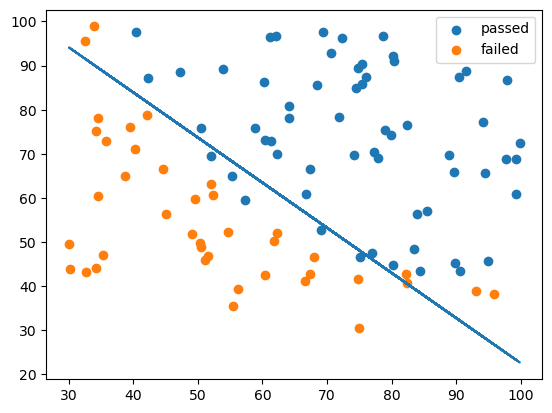

In [46]:
fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'Exam1'][flag],data.loc[:,'Exam2'][flag])
failed=plt.scatter(data.loc[:,'Exam1'][~flag],data.loc[:,'Exam2'][~flag])
plt.plot(x1,x2_new)
plt.xlabel = ('Examl')
plt.ylabel = ('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [53]:
# ceate new data
x1_2 = x1 * x1
x2_2 = x2 * x2
x1_x2 = x1 * x2

In [54]:
x_new = {'x1':x1, 'x2':x2, 'x1_2': x1_2, 'x2_2': x2_2, 'x1_x2': x1_x2 }
print(x_new)

{'x1': 0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64, 'x2': 0     78.024693
1     43.894998
2     72.902198
3     86.308552
4     75.344376
        ...    
95    48.380286
96    87.103851
97    68.775409
98    64.931938
99    89.529813
Name: Exam2, Length: 100, dtype: float64, 'x1_2': 0     1198.797805
1      917.284849
2     1285.036716
3     3621.945269
4     6246.173368
         ...     
95    6970.440295
96    1786.051355
97    9863.470975
98    3062.517544
99    5591.434174
Name: Exam1, Length: 100, dtype: float64, 'x2_2': 0     6087.852690
1     1926.770807
2     5314.730478
3     7449.166166
4     5676.775061
         ...     
95    2340.652054
96    7587.080849
97    4730.056948
98    4216.156574
99    8015.587398
Name: Exam2, Length: 100, dtype: float64, 'x1_x2': 0     2701.500406
1     1329.435094
2     2613

In [55]:
x_new = pd.DataFrame(x_new)

In [56]:
x_new

,x1,x2,x1_2,x2_2,x1_x2
0,34.623660,78.024693,1198.797805,6087.852690,2701.500406
1,30.286711,43.894998,917.284849,1926.770807,1329.435094
2,35.847409,72.902198,1285.036716,5314.730478,2613.354893
3,60.182599,86.308552,3621.945269,7449.166166,5194.273015
4,79.032736,75.344376,6246.173368,5676.775061,5954.672216
...,...,...,...,...,...
95,83.489163,48.380286,6970.440295,2340.652054,4039.229555
96,42.261701,87.103851,1786.051355,7587.080849,3681.156888
97,99.315009,68.775409,9863.470975,4730.056948,6830.430397
98,55.340018,64.931938,3062.517544,4216.156574,3593.334590


In [58]:
LR2 = LogisticRegression()
LR2.fit(x_new, y)

LogisticRegression()

In [59]:
LR2.coef_

array([[-8.95942818e-01, -1.40029397e+00, -2.29434572e-04,
         3.93039312e-03,  3.61578676e-02]])

In [60]:
thera0 = LR2.intercept_
thera1, theta2, theta3, theta4, theta5 = LR2.coef_[0][0], LR2.coef_[0][1], LR2.coef_[0][2], LR2.coef_[0][3], LR2.coef_[0][4]

In [71]:
x1_new = x1.sort_values()

In [72]:
a = theta4
b = theta5*x1_new + theta2
c = theta0+theta1*x1_new+theta3*x1_new*x1_new
x2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(x2_new_boundary)

63    120.159927
1     118.526670
57    102.680156
70    101.710544
36     93.958788
         ...    
56      3.353217
47      3.336794
51      3.146492
97      3.141246
75      3.078511
Name: Exam1, Length: 100, dtype: float64



fig5 = plt.figure()
passed=plt.scatter(data.loc[:,'Exam1'][flag],data.loc[:,'Exam2'][flag])
failed=plt.scatter(data.loc[:,'Exam1'][~flag],data.loc[:,'Exam2'][~flag])
plt.plot(x1_new,x2_new_boundary)
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

plt.plot(x1,x2_new_boundary)
plt.show()

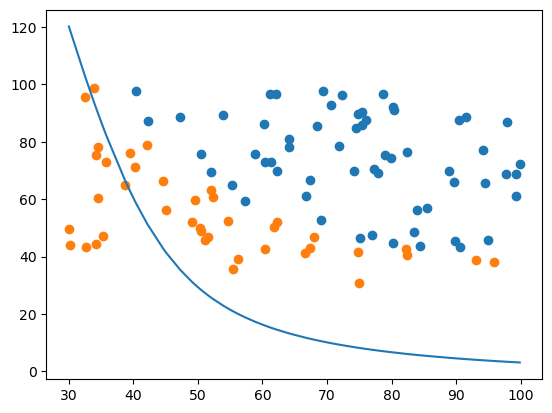

In [79]:
figure6 = plt.figure()
passed = plt.scatter(data.loc[:, 'Exam1'][flag], data.loc[:, 'Exam2'][flag])
failed = plt.scatter(data.loc[:, 'Exam1'][~flag], data.loc[:, 'Exam2'][~flag])
plt.plot(x1_new, x2_new_boundary)
# plt.title('Exam1', 'Exam2')
plt.show()

In [ ]:
_